In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 14858, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 14858 (delta 140), reused 173 (delta 122), pack-reused 14655
Receiving objects: 100% (14858/14858), 13.88 MiB | 7.53 MiB/s, done.
Resolving deltas: 100% (10223/10223), done.
/content/yolov5
     |████████████████████████████████| 182 kB 28.3 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 1.6 MB 60.6 MB/s 
     |████████████████████████████████| 42 kB 981 kB/s 
     |████████████████████████████████| 67 kB 7.0 MB/s 
     |████████████████████████████████| 138 kB 49.0 MB/s 
     |████████████████████████████████| 145 kB 49.3 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 178 kB 52.9 MB/s 
     |████████████████████████████████| 62 kB 789 kB/s 


In [2]:
import torch
import os
from IPython.display import Image, clear_output 

In [3]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.0+cu116 (Tesla T4)


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="JOCurbzZwP7ZjZojvmYH")
project = rf.workspace("sample-swtbf").project("tom_and_jerry-wkvik")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Tom_and_Jerry-2 in yolov5pytorch:: 100%|██████████| 712/712 [00:00<00:00, 1531.71it/s]


In [5]:
!python train.py --img 416 --batch 25 --epochs 70 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Tom_and_Jerry-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=70, batch_size=25, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-46-g96a71b1 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0

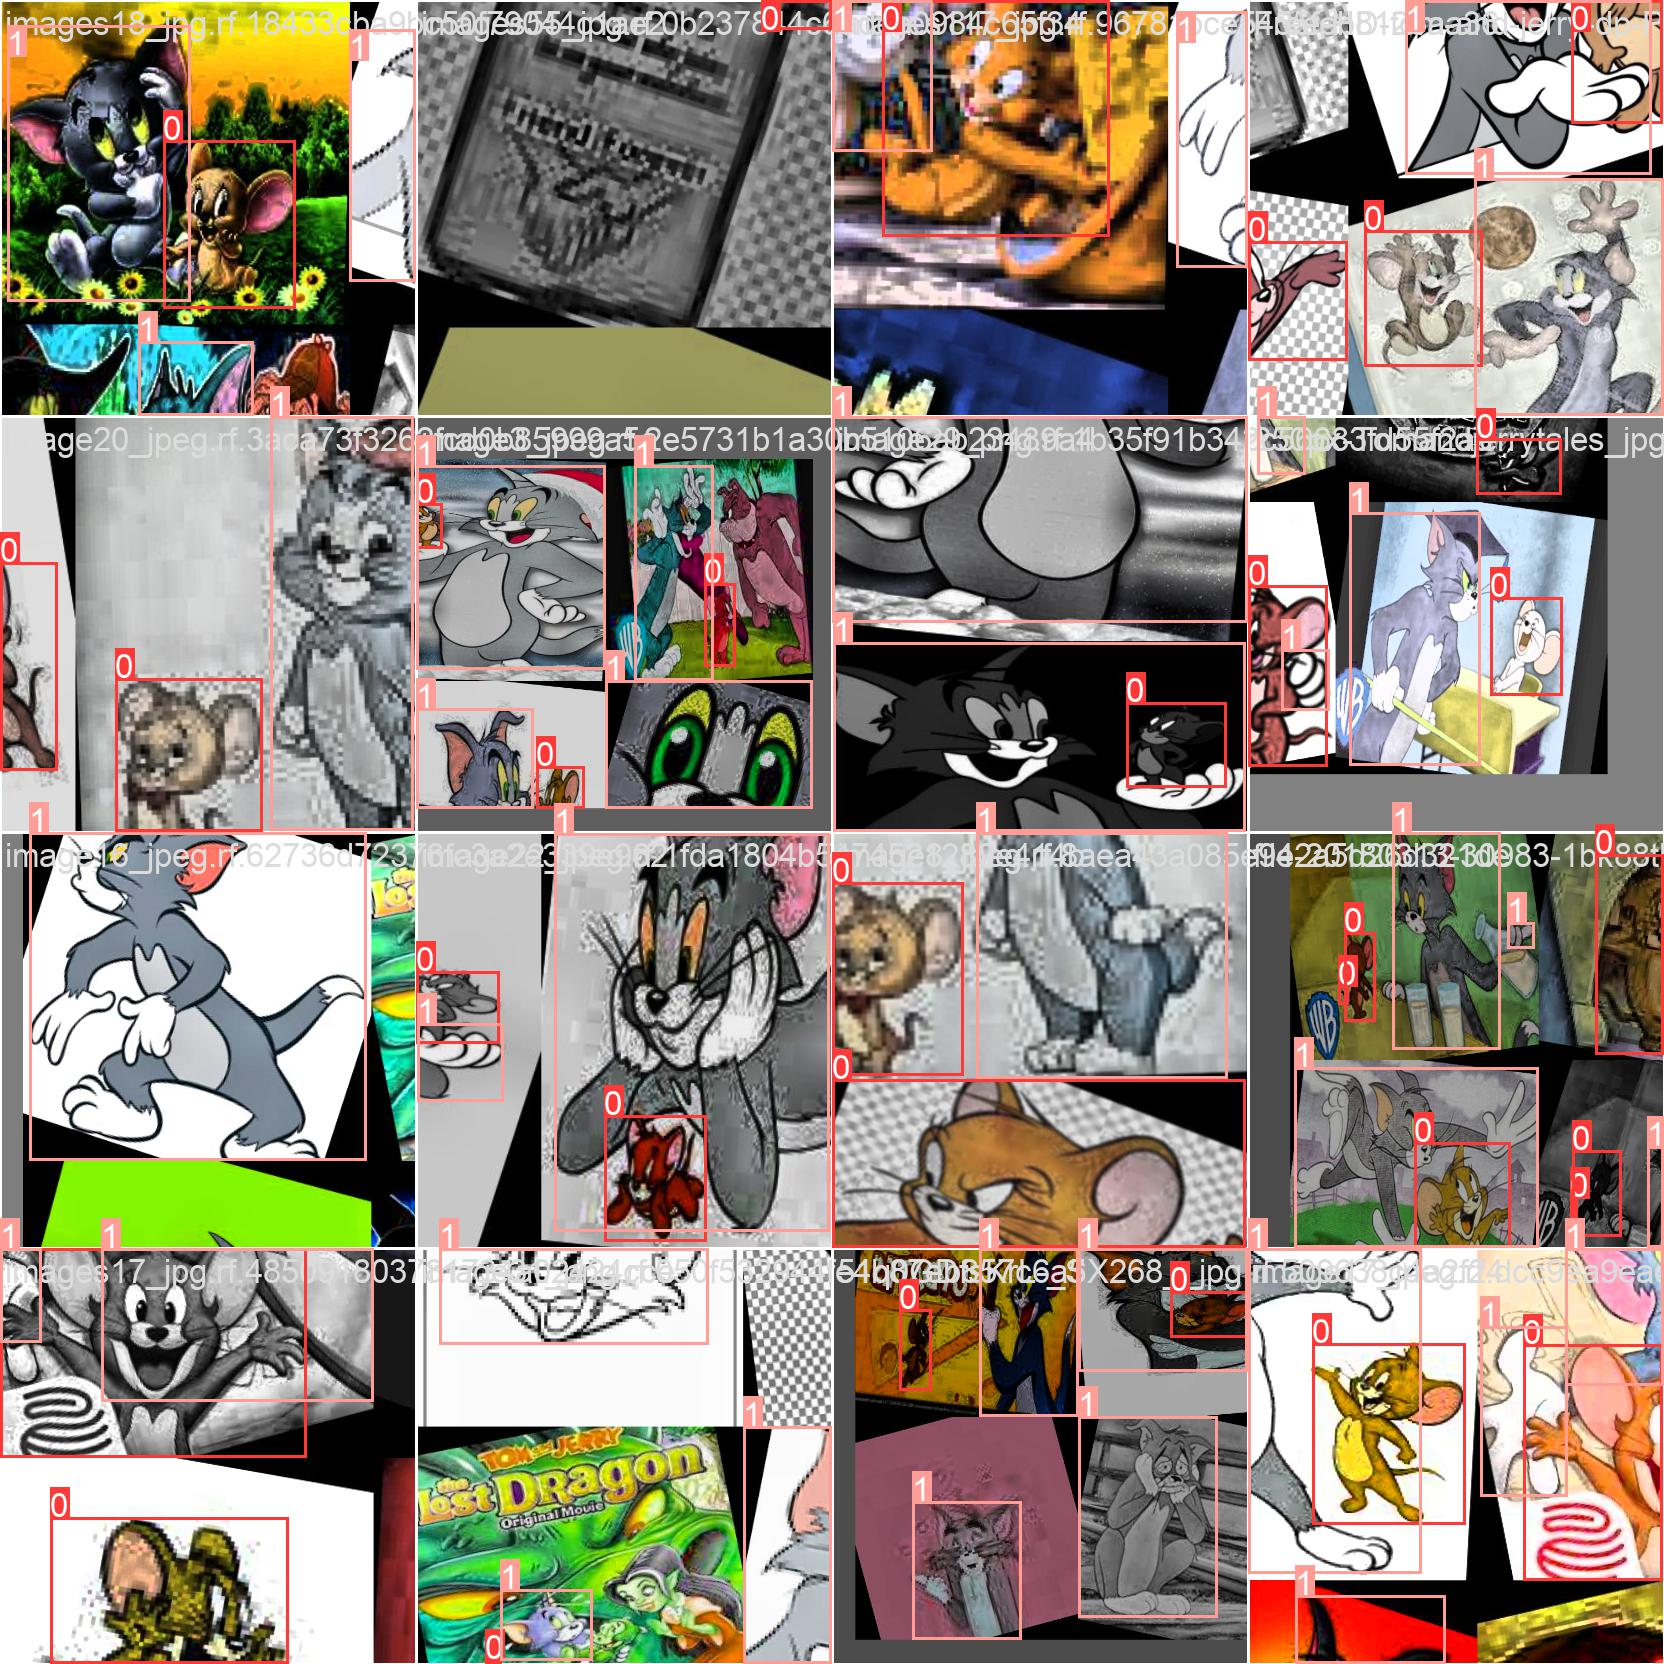

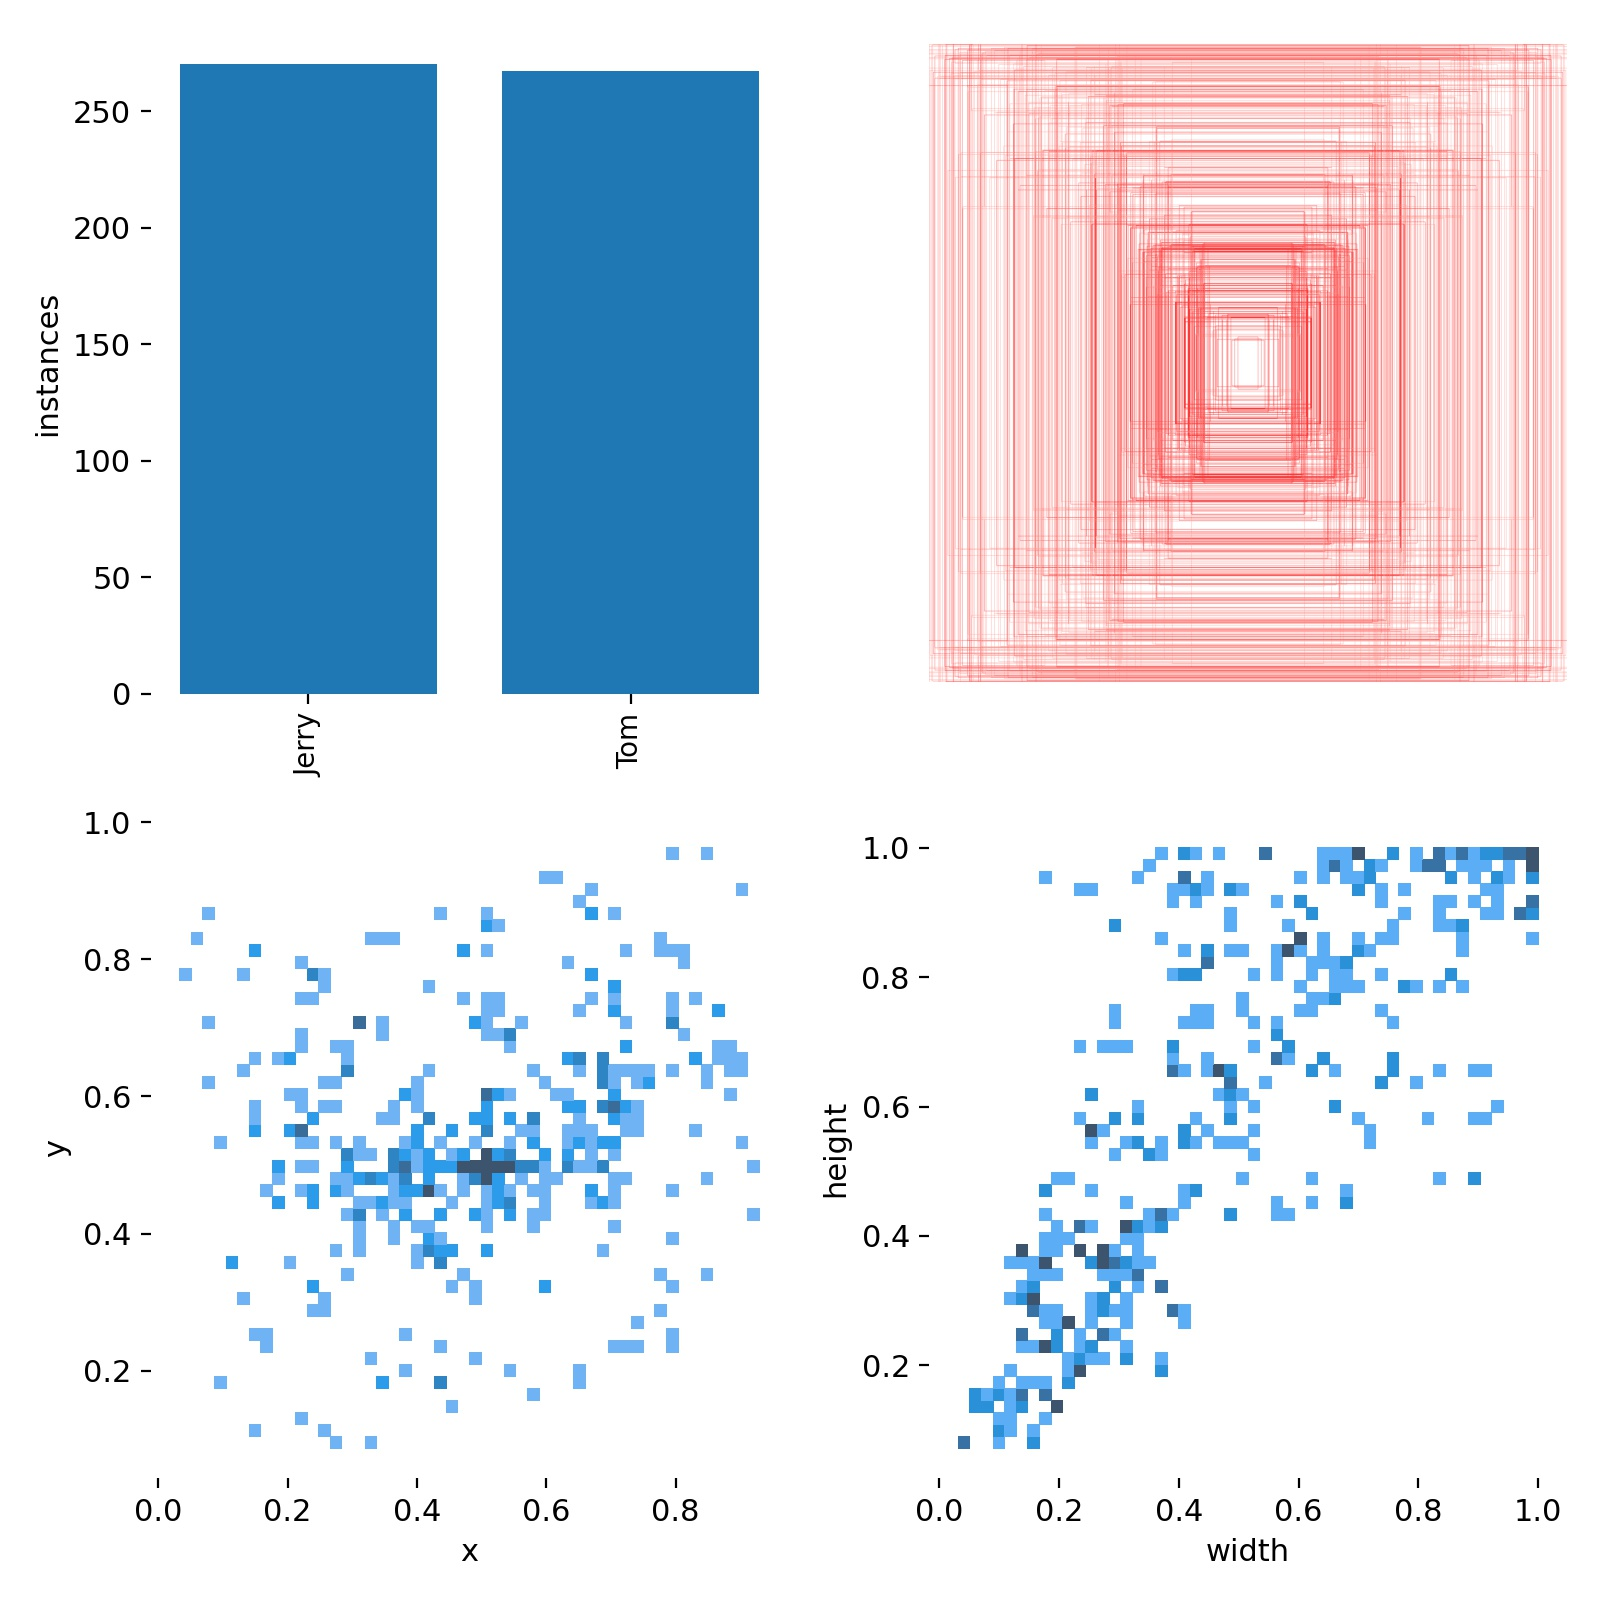

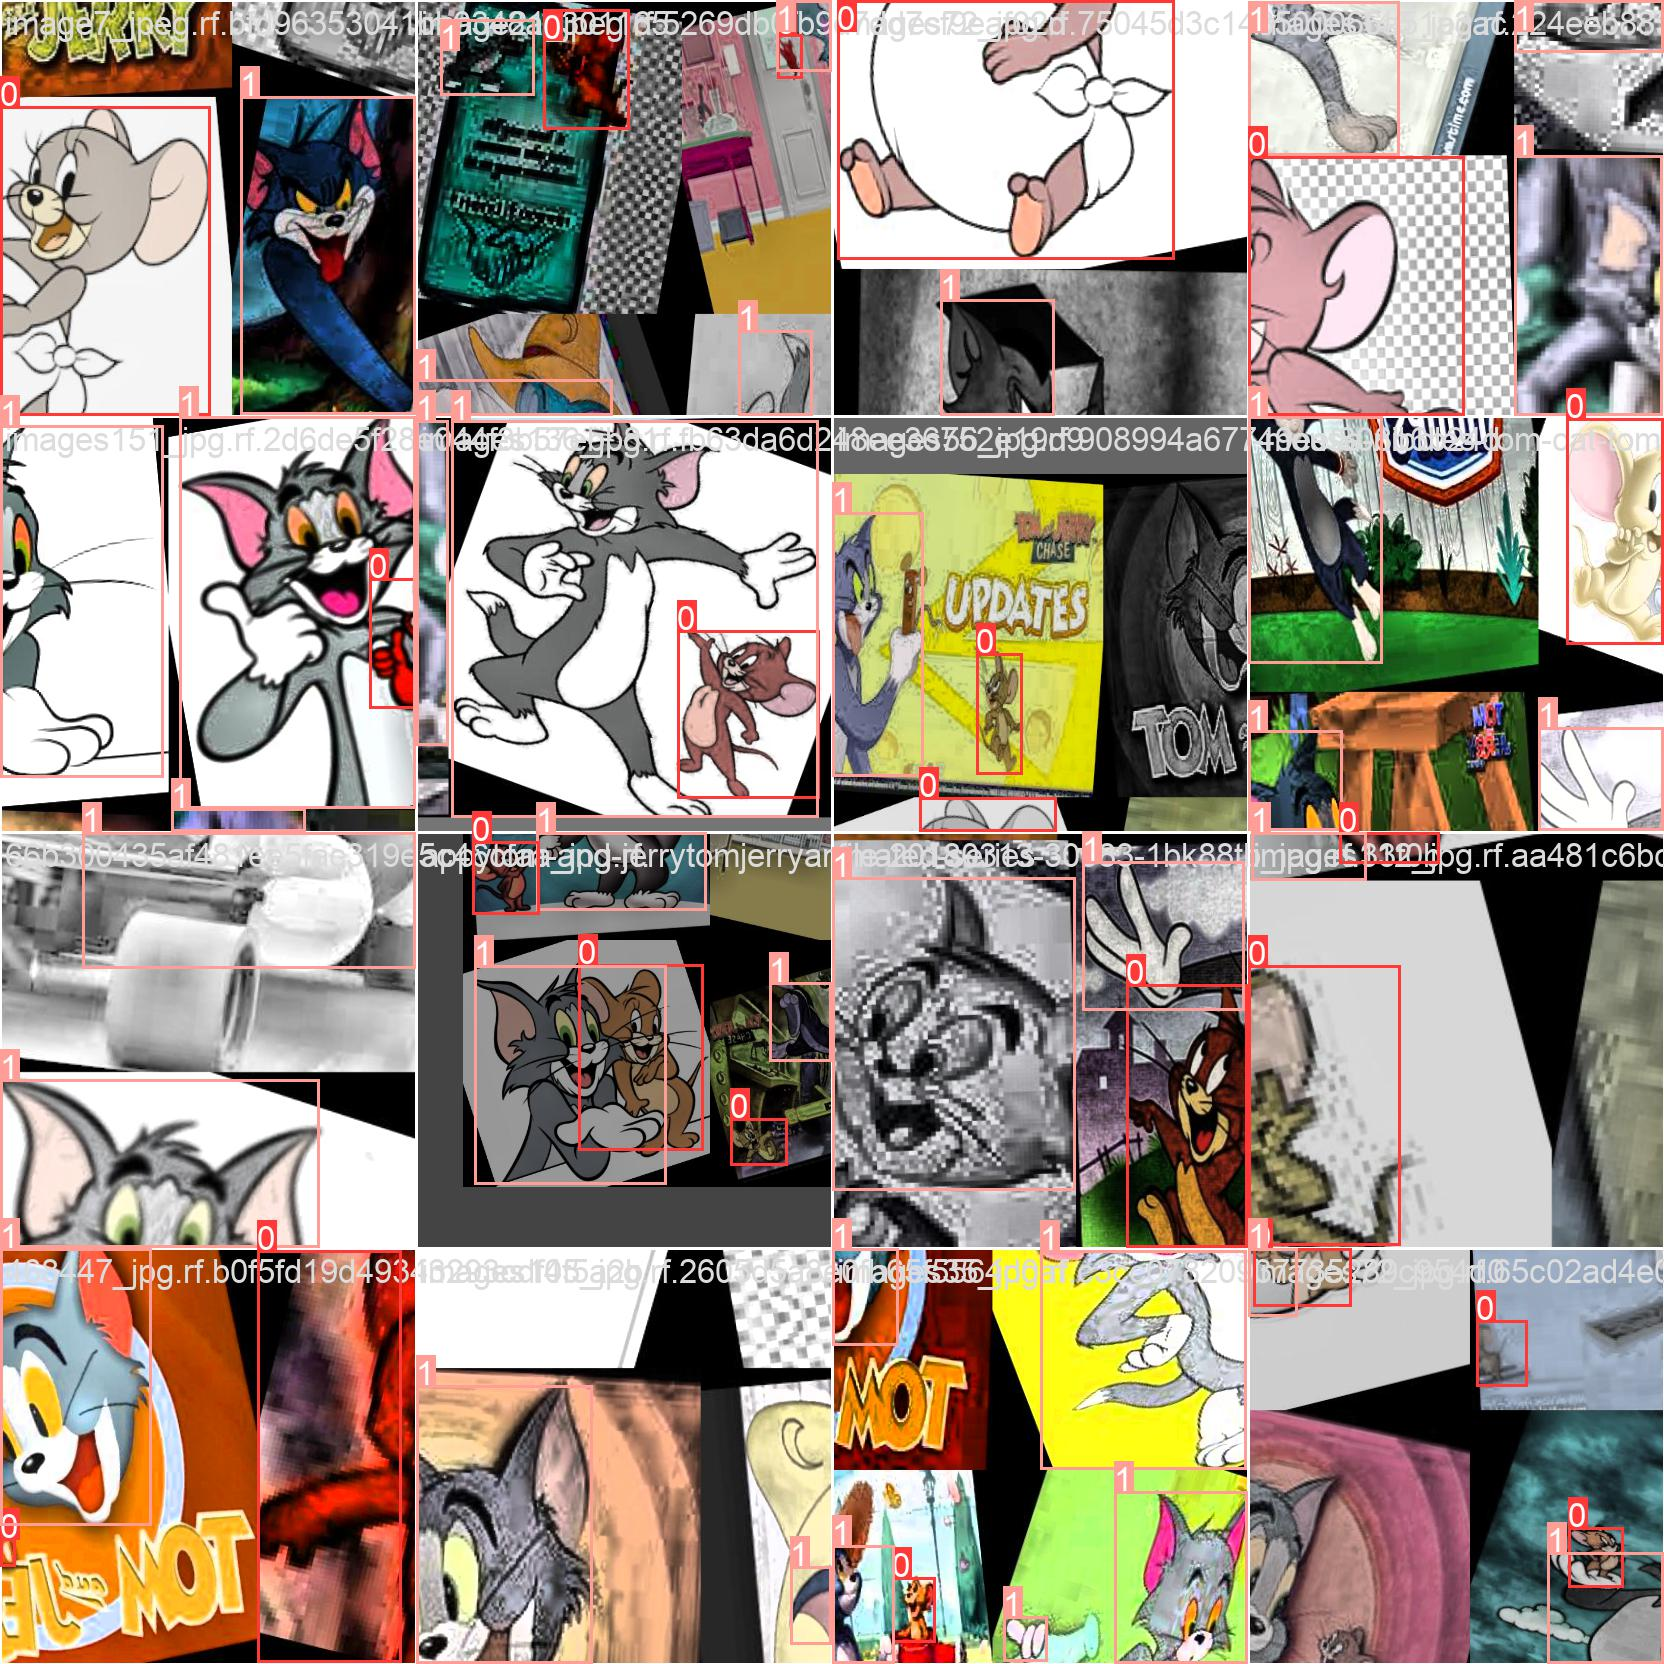

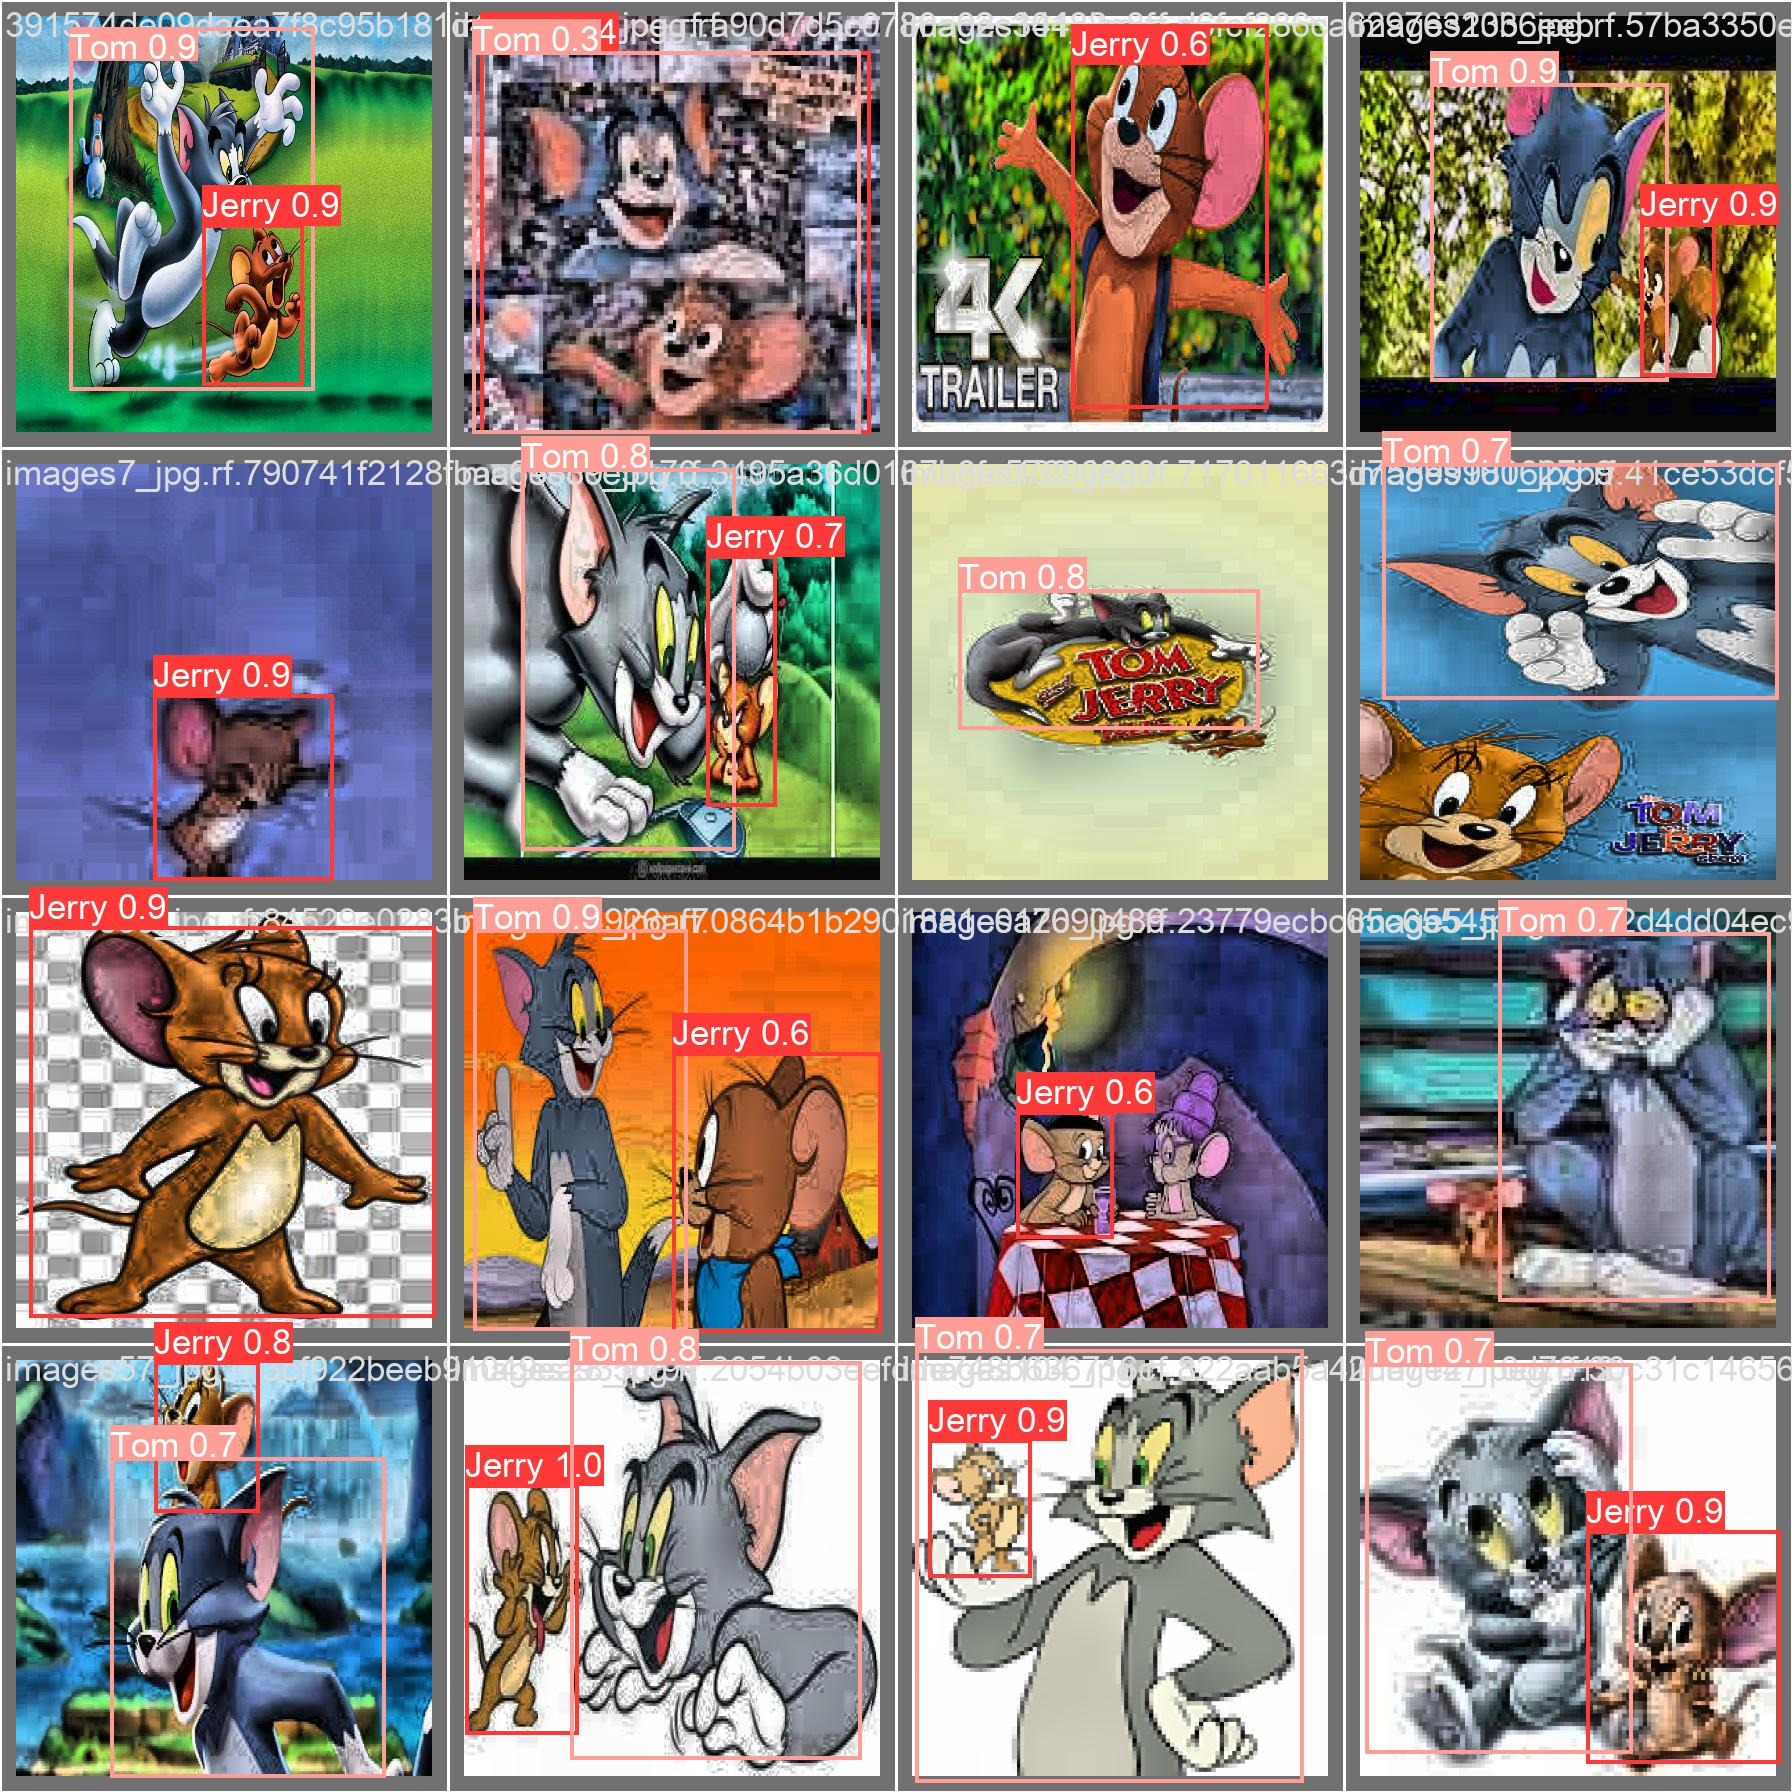

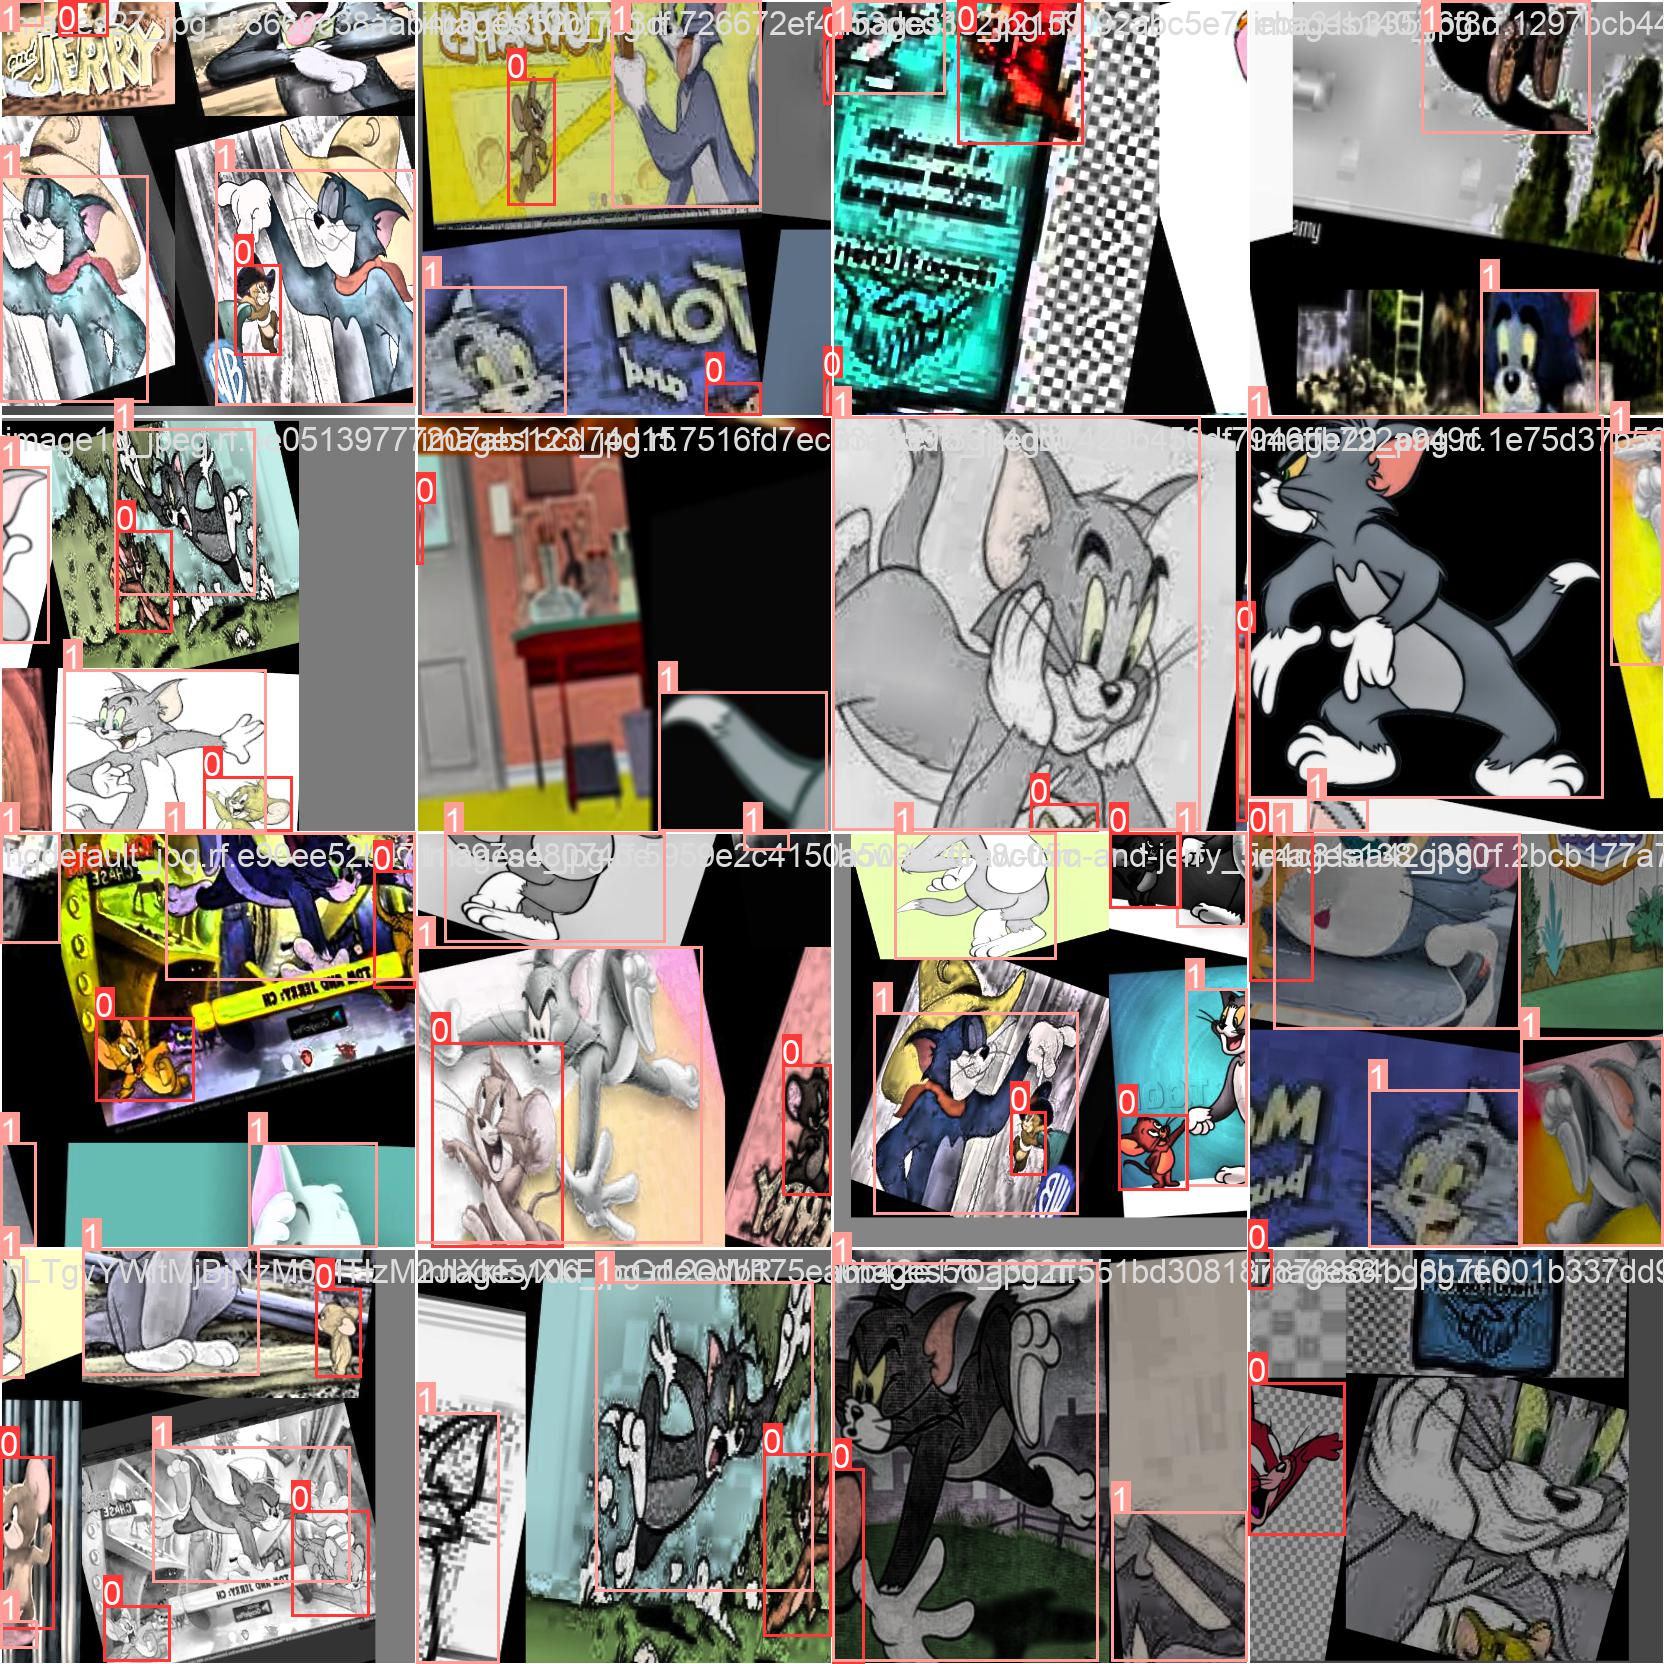

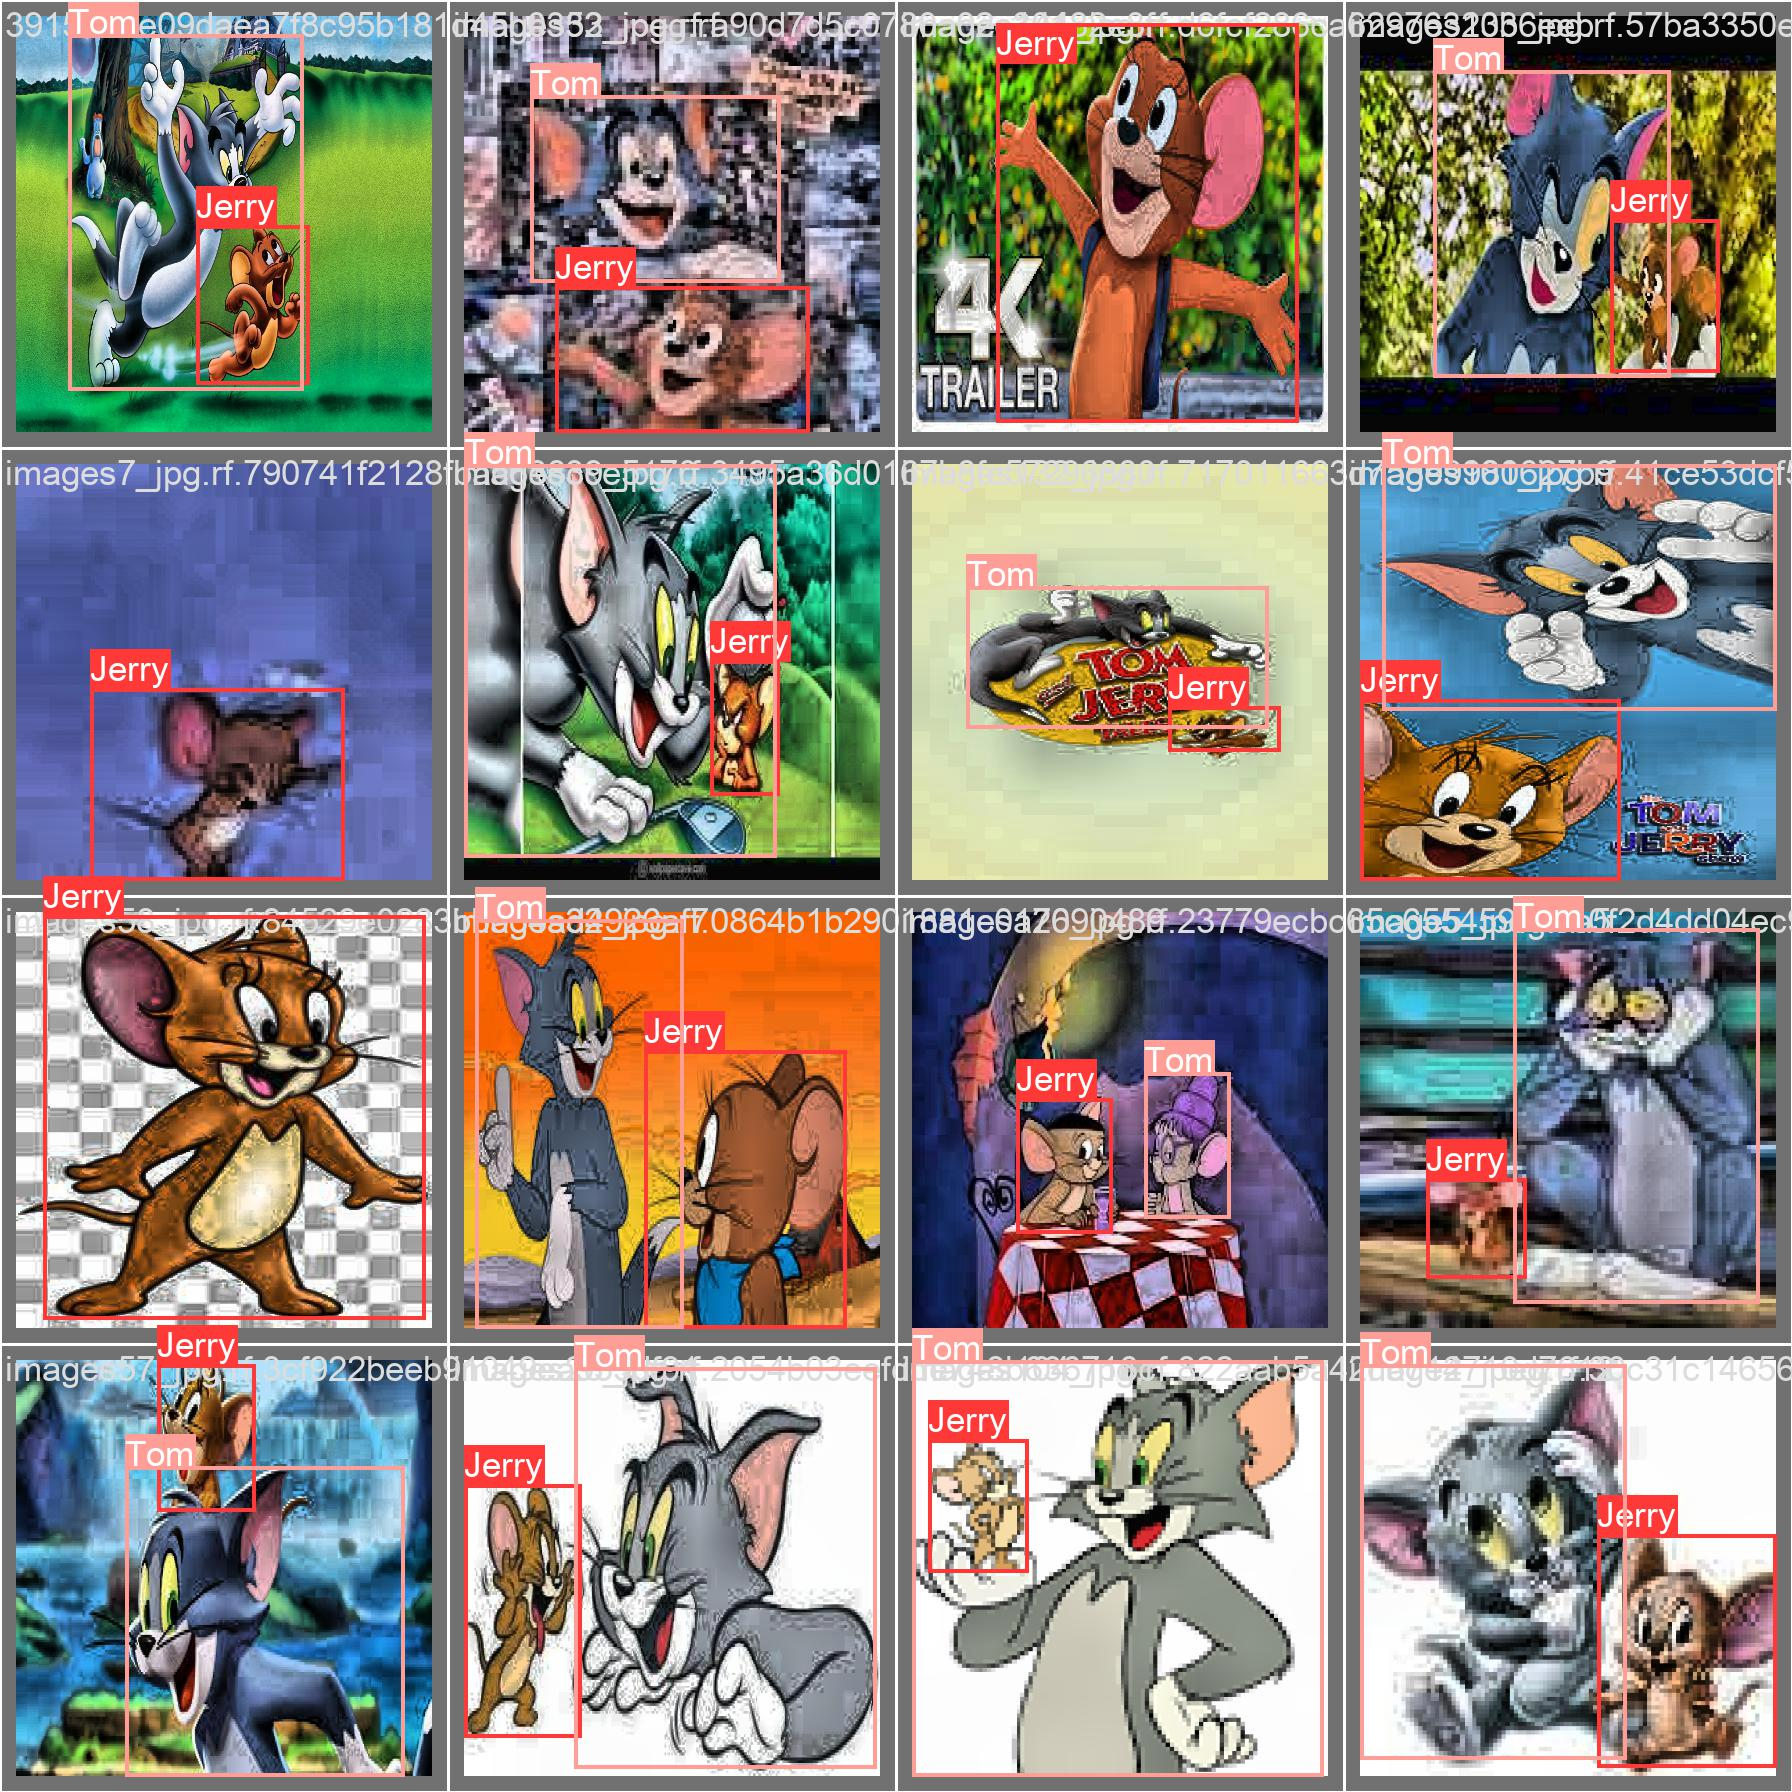

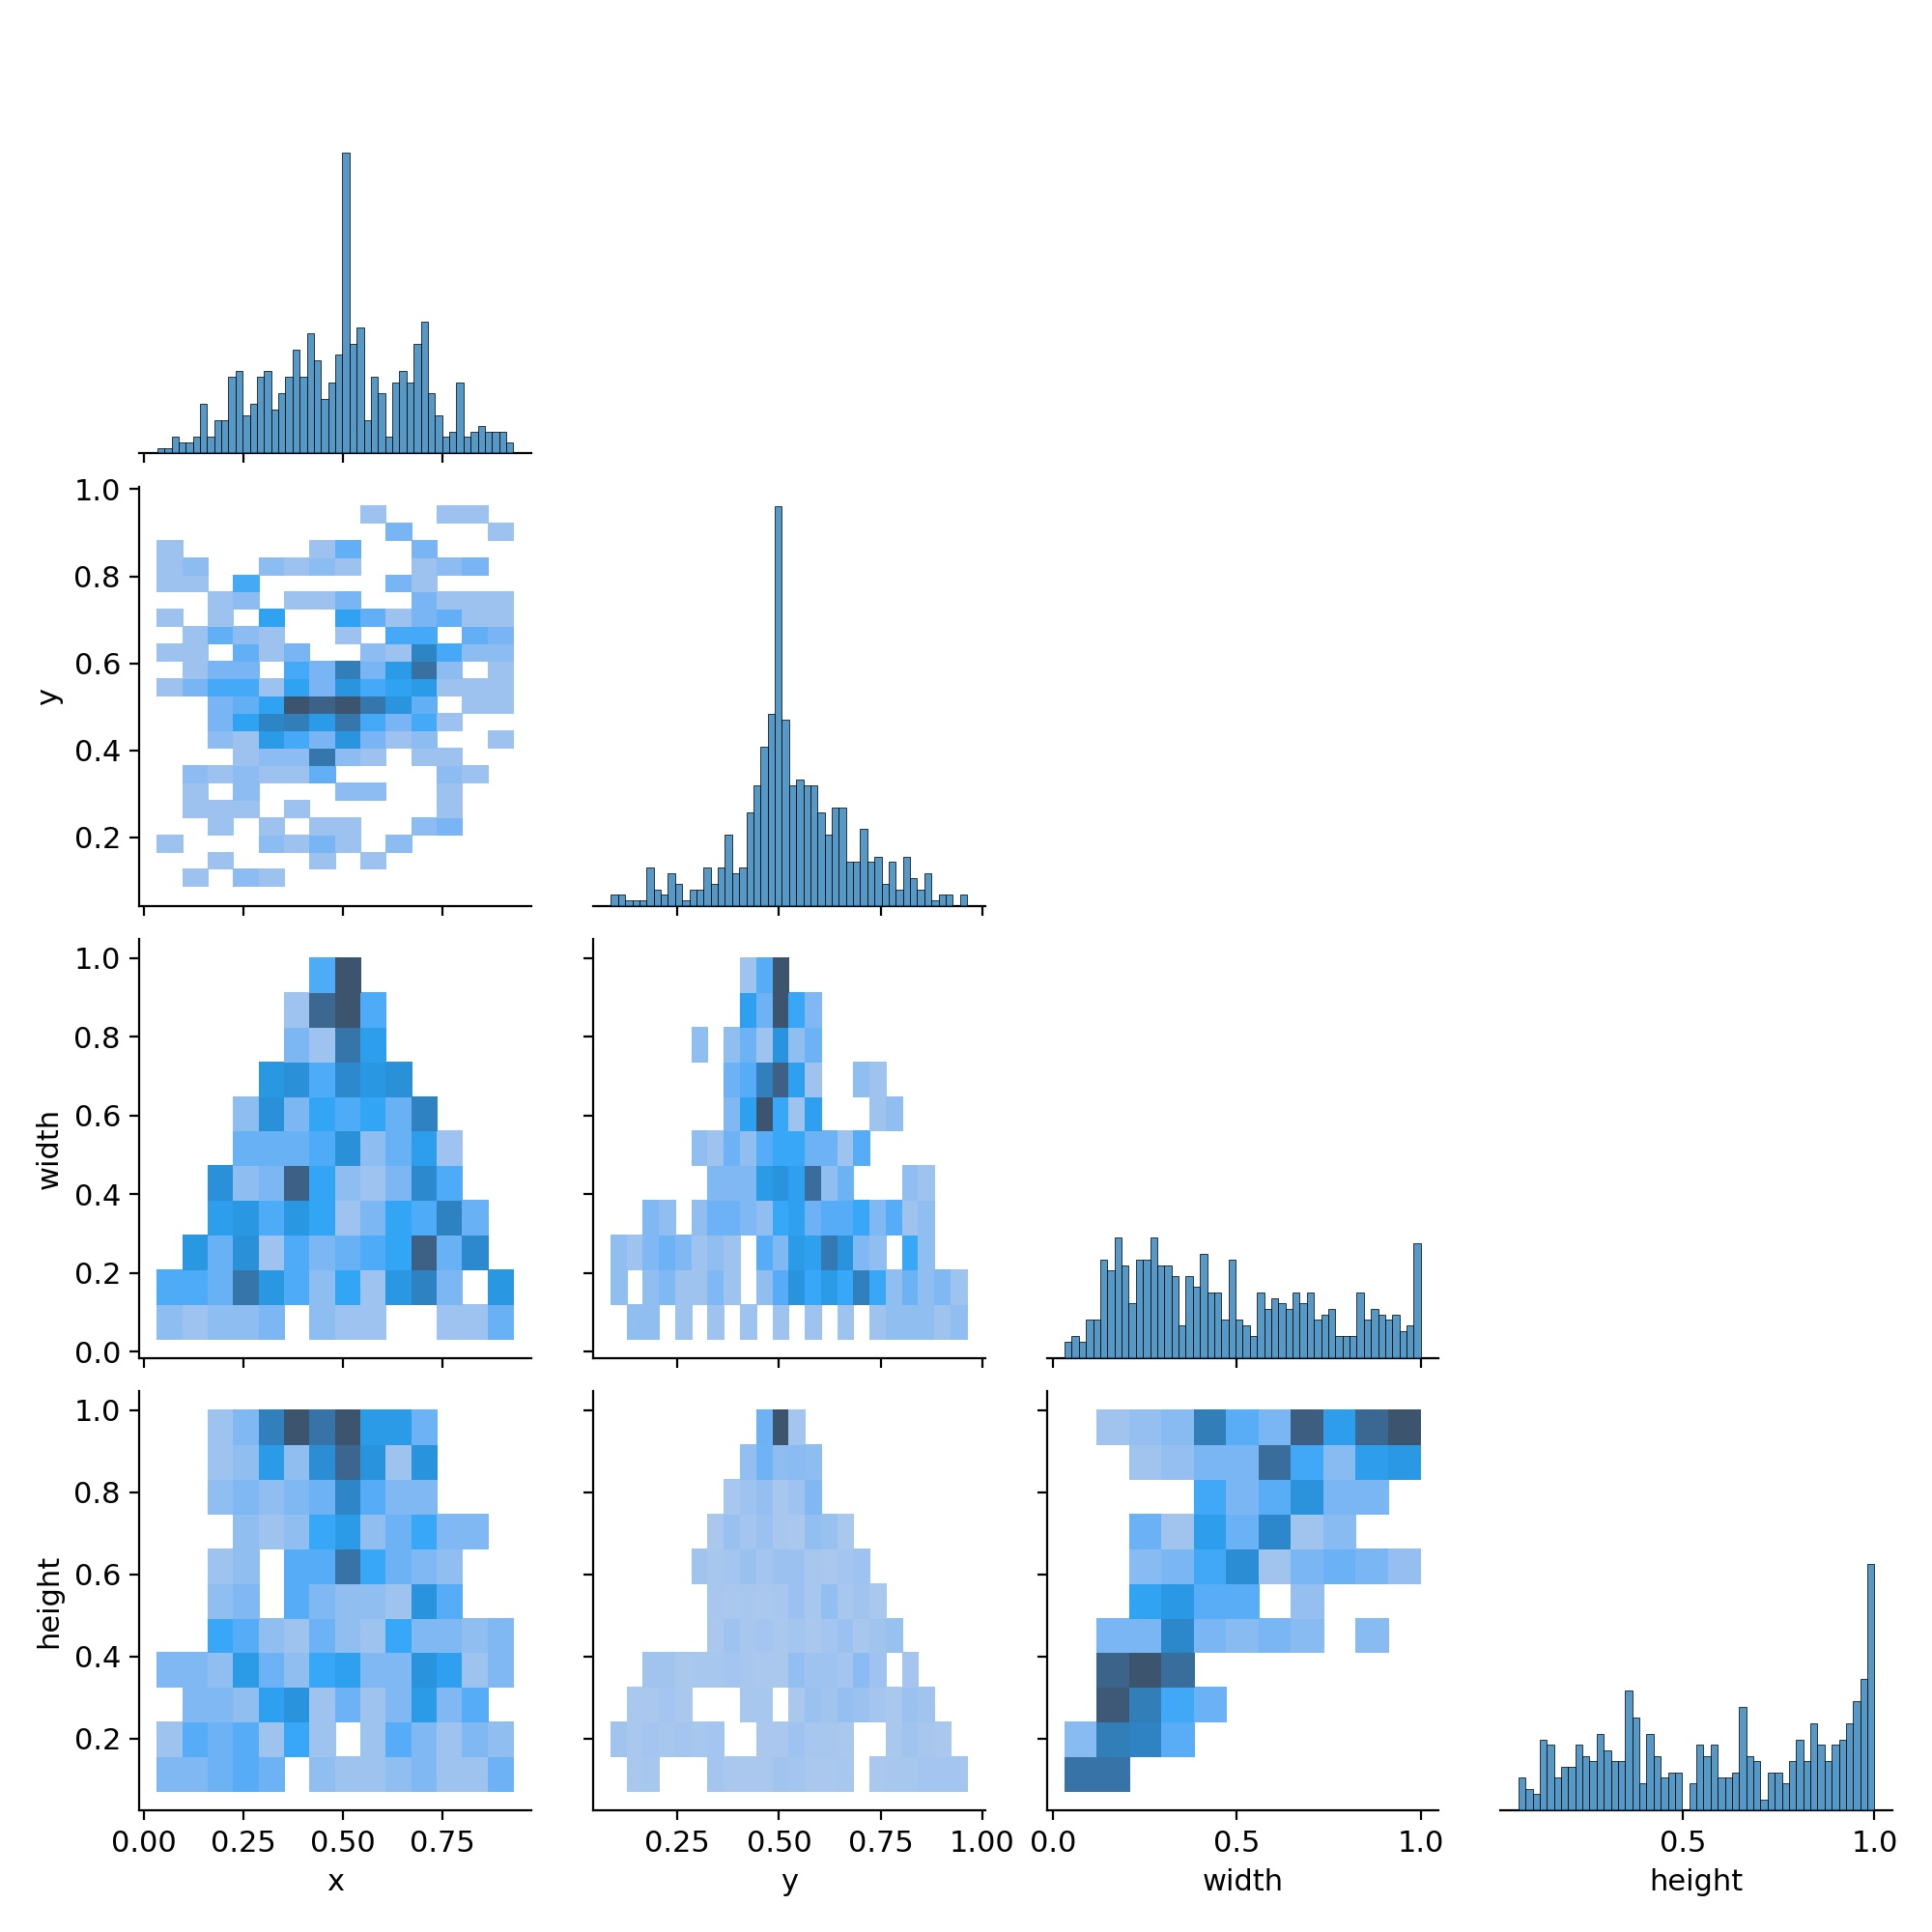

In [9]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/train/exp/*.jpg'): 
    display(Image(filename=imageName))
    print("\n")



In [7]:
#!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source https://www.dailymotion.com/video/x2v9hdy
